# <center><b>The Sparks Foundation</b></center>

# <center><b>Task - 1 : Prediction using Supervised Machine Learning</b></center>

#### <p><center>In these task we have to predict the percentage of an student based on the number of study hours. Simply, This is a Simple Linear Regression Problem.</center></p>

### <center><b>Author : Ritik Ratnawat</b></center>
#### <center><b>( Data Science and Business Analytics Intern )</b></center>

<br>

### <b>Simple Linear Regression</b>

<p>Linear regression is one of the easiest and most popular Machine Learning algorithms. It is a statistical method that is used for predictive analysis. Linear regression makes predictions for continuous/real or numeric variables such as sales, salary, age, product price, etc.</p>

<p>Linear regression algorithm shows a linear relationship between a dependent (y) and one or more independent (y) variables, hence called as linear regression. Since linear regression shows the linear relationship, which means it finds how the value of the dependent variable is changing according to the value of the independent variable.</p>

<p>The linear regression model provides a sloped straight line representing the relationship between the variables. 
Mathematically, we can represent a linear regression as:

    y = a0 + a1*x + ε

Here,
<ul>
<li>Y= Dependent Variable (Target Variable)
<li>X= Independent Variable (predictor Variable)
<li>a0= intercept of the line (Gives an additional degree of freedom)
<li>a1 = Linear regression coefficient (scale factor to each input value).
<li>ε = random error</p>
</ul></p>

<br>

### <b>Importing Libraries</b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

<br>

### <b>Loading the Dataset</b>

In [2]:
fileurl = "https://raw.githubusercontent.com/RitikRatnawat/TheSparksFoundation/main/Task1%20Dataset.csv"
data = pd.read_csv(fileurl)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


<br>

### <b>Checking the Size of the Data</b>
In this section we use "shape" attribute of Dataframe which returns a tuple in which first element represent number of rows and second one represent the number of columns.

In [3]:
data.shape

(25, 2)

<br>

### <b>Checking for Null values</b> 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


<br>As we can see above that there are no missing values in our dataset. So there no need of handling of missing values. 

<br>

### <b>Summary Statistics</b>

Here, we use the describe() to get the statistical summary of the data which includes min and max value, mean and standard deviation, quartiles and count.

In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#### <b>Key Observations</b>
<ul>
    <li>The Mean value is greater than the Median value ( i.e. 50% Percentile ).
    <li>The difference between the 75% Percentile and max value is very small.
    <li>From above observations, we can conclude that there no outliers present in the dataset.
</ul>

<br>

### <b>Checking for Outliers using Boxplot</b>

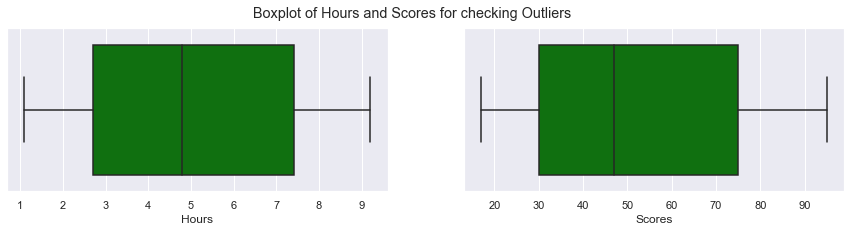

In [6]:
fig, axes = plt.subplots(1,2, figsize = (15, 3))
fig.suptitle("Boxplot of Hours and Scores for checking Outliers")
sns.set_style('whitegrid')
sns.boxplot(ax = axes[0], x = data['Hours'], color = 'green')
sns.boxplot(ax = axes[1], x = data['Scores'], color = 'green')
plt.show()

This boxplot also verifies that there is no outliers present in the dataset. So, there is no need of handling of outliers.

<br>

### <b>Finding the Correlation between Input variable and Target variable</b>

<p>A correlation is a statistical measure of the relationship between two variables. The measure is best used in variables that demonstrate a linear relationship between each other.</p>
<p>The correlation coefficient is a value that indicates the strength of the relationship between variables. The coefficient can take any values from -1 to 1. The interpretations of the values are :
<ul>
    <li> -1: Perfect negative correlation. The variables tend to move in opposite directions (i.e., when one variable increases, the other variable decreases).
    <li> 0: No correlation. The variables do not have a relationship with each other.
    <li> 1: Perfect positive correlation. The variables tend to move in the same direction (i.e., when one variable increases, the other variable also increases).</ul></p>

<AxesSubplot:>

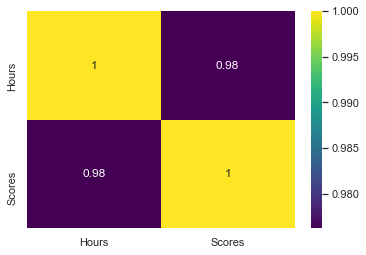

In [7]:
correlation = data.corr()
sns.heatmap(correlation, annot = True, cmap = "viridis")

From above Heatmap, we can see that both input and target variable are highly correlated in the positive direction.

<br>

### <b>Finding relation between input and target variable using Scatter Plot</b>

The fit of the data can be visually represented in a scatterplot. Using a scatterplot, we can generally assess the relationship between the variables and determine whether they are correlated or not.

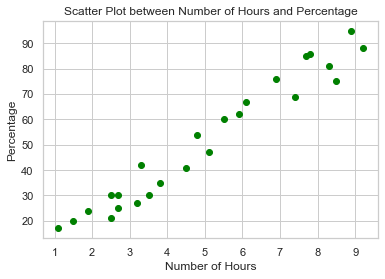

In [8]:
plt.scatter(data['Hours'], data['Scores'], c = "Green")
plt.title("Scatter Plot between Number of Hours and Percentage")
plt.xlabel("Number of Hours")
plt.ylabel("Percentage")
plt.show()

The above Scatter Plot shows that if Student increases its study hours, there is a possibility that his/her score might also increase.

<br>

### <b>Data Preparation </b>

##### <b>Splitting the data into Input variables and Target variable</b>

In [9]:
X = data['Hours'].values.reshape(-1, 1)
Y = data['Scores'].values.reshape(-1, 1)

##### <b>Splitting the data into Training and Test Set</b>

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
print("Training Set X : ",x_train.shape)
print("Training Set Y : ",y_train.shape)
print("Test Set X : ",x_test.shape)
print("Test Set X : ",y_test.shape)

Training Set X :  (20, 1)
Training Set Y :  (20, 1)
Test Set X :  (5, 1)
Test Set X :  (5, 1)


<br>

### <b>Model Development</b>

Here, we build a ML model of Simple Linear Regression using Scikit-Learn library and training the model through the given dataset to predict the score of the Student based on the number of hours he/she study.

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

print("Coefficient : ", regression_model.coef_)
print("Intercept : ", regression_model.intercept_)

Coefficient :  [[9.91065648]]
Intercept :  [2.01816004]


<br>

##### <b>Plotting the fitted regression line on the Scatter Plot</b>

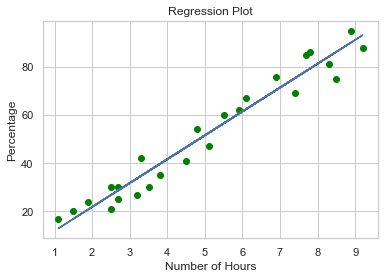

In [13]:
line = regression_model.coef_ * X + regression_model.intercept_

plt.scatter(X, Y, c = 'Green')
plt.title("Regression Plot")
plt.xlabel("Number of Hours")
plt.ylabel("Percentage")
plt.plot(X, line)
plt.show()

##### <b>Prediction on Test set using Model</b>

In [14]:
y_pred = regression_model.predict(x_test)
y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

<br>

### <b>Model Evaluation</b>

In this section, we evalute the accuracy of the model in prediction of Scores of the Student. 

In [15]:
from sklearn.metrics import mean_absolute_error, r2_score 

In [16]:
print("Mean Absolute Error : ", mean_absolute_error(y_test, y_pred))
print("R2_score : ", r2_score(y_test, y_pred))

Mean Absolute Error :  4.183859899002975
R2_score :  0.9454906892105355


<b>Conclusion : </b>Our model is working with 94% explained variance which means the model is better fit for the data.

<br>

### <b>Prediction Using Model</b>

#### What will be predicted score if a student studies for 9.25 hrs/ day?

In [24]:
Hour = np.array([9.25]).reshape(-1,1) 
Percentage = regression_model.predict(Hour)
Percentage = np.round(Percentage, decimals = 1)
Percentage

array([[93.7]])

<b>Here, the Linear regression model predicts that if a Student study for 9.25 hours, then he/she will get approximately 93.7% score.</b>